In [5]:
#Load Packages
import pandas as pd
import numpy as np

In [6]:
#Load Data Packages
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
#Text Cleaning
import neattext.functions as nfx

In [8]:
# Load Dataset
data = pd.read_csv('./emotion-dataset.csv')

In [9]:
#Preview Dataset
data.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [10]:
#Shape of Dataset
data.shape

(34792, 2)

In [11]:
#Data Types
data.dtypes

Emotion    object
Text       object
dtype: object

In [12]:
#Check for Missing Values
data.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [13]:
#Value Counts of Emotions
data['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion'>

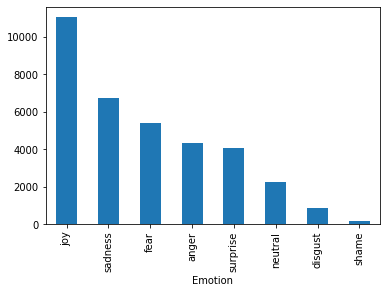

In [14]:
# value counts of emotions
data['Emotion'].value_counts().plot(kind='bar')

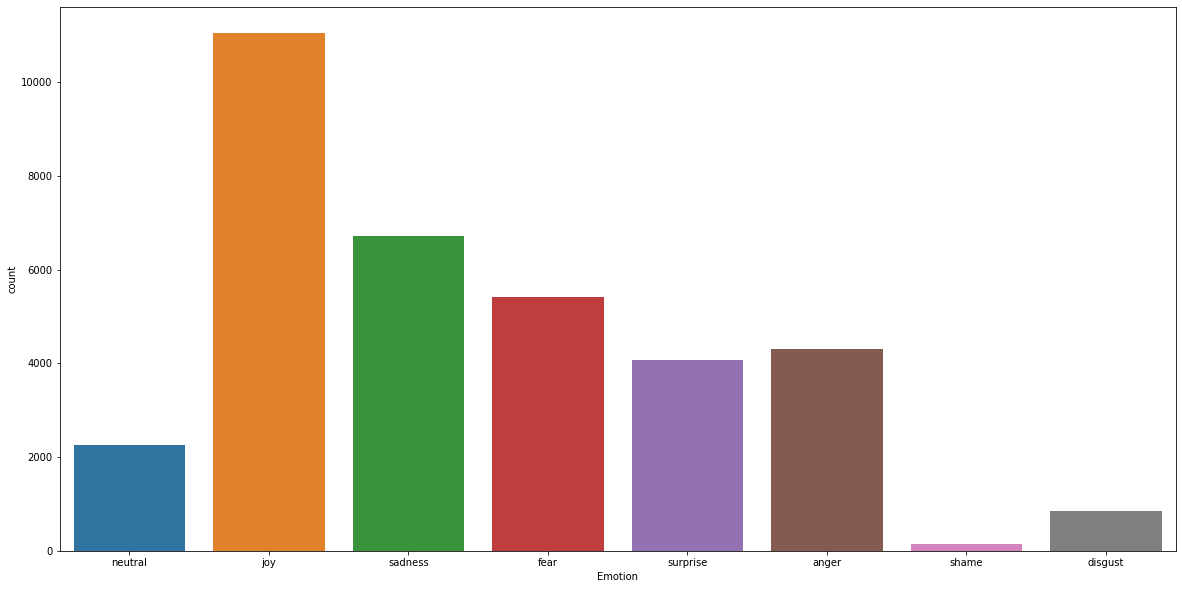

In [15]:
#Using Seaborn to Plot
plt.figure(figsize=(20,10))
sns.countplot(x='Emotion', data=data)
plt.show()

### Exploration
+ Text Cleaning
+ Sentiment Analysis
+ Keyword Extraction
    - Keywords for each emotion
    - Wordclud

In [16]:
# Sentiment Analysis
from textblob import TextBlob


In [17]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment>0:
        result = "Positive"
    elif sentiment<0:
        result = "Negative"
    else:
        result = "Neutral"
    return result

In [18]:
# Test Fxn
get_sentiment("I love coding")

'Positive'

In [19]:
data['Sentiment'] = data['Text'].apply(get_sentiment)

In [20]:
data.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [21]:
# Compare our Emotion vs Sentiment
data.groupby(['Emotion', 'Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

<Axes: xlabel='Emotion,Sentiment'>

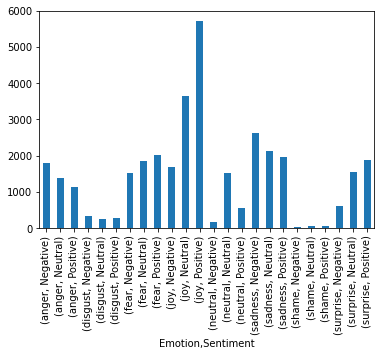

In [22]:
# First Method : Using Matplotlib
#Compare our Emotion vs Sentiment
data.groupby(['Emotion', 'Sentiment']).size().plot(kind='bar')

In [23]:
# using Seaborn
#sns.factorplot
sns.catplot

<function seaborn.categorical.catplot(data=None, *, x=None, y=None, hue=None, row=None, col=None, col_wrap=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, height=5, aspect=1, kind='strip', native_scale=False, formatter=None, orient=None, color=None, palette=None, hue_norm=None, legend='auto', legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, ci='deprecated', **kwargs)>

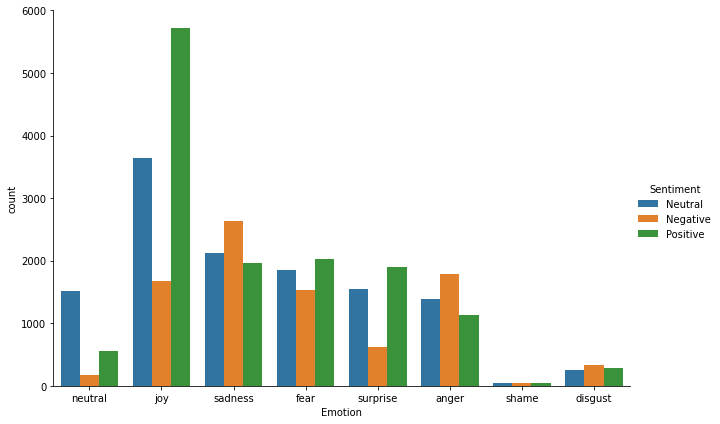

In [24]:

sns.catplot(x='Emotion', hue = 'Sentiment',data = data, kind = 'count', height = 6, aspect = 1.5)


### Text Cleaning
+ Remove noise
    - stopwords
    - special characters
    - punctuations
    - emojis

In [25]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [26]:
data['Clean_Text']=data['Text'].apply(nfx.remove_shortwords)

In [27]:
data['Clean_Text']= data['Clean_Text'].apply(nfx.remove_userhandles)


In [28]:
data['Clean_Text']= data['Clean_Text'].apply(nfx.remove_punctuations)

In [29]:
data[['Text', 'Clean_Text']]

,Text,Clean_Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,HOMEGIRL BABY FUNERAL HATE FUNERALS THIS REALL...
3,Such an eye ! The true hazel eye-and so brill...,Such true hazel brilliant Regular features ope...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Iluvmiasantos babe hugggzzz babe naamazed babe...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,MichelGW have gift Hope like hand made wear ke...
34788,The world didnt give it to me..so the world MO...,world didnt give world MOST DEFINITELY take away
34789,A man robbed me today .,robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu call JEALOUSY call Losing


### Keyword Extraction
+ Extract most commonest words per class of emotion

In [30]:
from collections import Counter

In [31]:
def extract_keywords(text, num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [32]:
#list of emotions
emotion_list = data['Emotion'].unique().tolist()
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [33]:
joy_list =  data[data['Emotion'] == 'joy']['Clean_Text'].tolist()

In [34]:
# Joy Document
joy_docx = ' '.join(joy_list)
joy_docx

'Sage upgrade list tommorow Such true hazel brilliant Regular features open countenance with complexion What bloom full health such pretty height size such firm upright figure There health merely bloom head glance hears sometimes child being picture health always gives idea being complete picture grown health loveliness itself Iluvmiasantos babe hugggzzz babe naamazed babe despite nega pinaramdam once life Leopold must have been truly happy hopes prayers beloved seemed last have come fruition have feeling will fail french fuckfrench Good When fell love with Overnight felt confidence self esteem responsible worthwhile could terribly ecstatic that would dangerous thing When selected study here university Yeah been ages have been When passed exams with first class results When heard that been selected first year university Zambia This after form five Chikola secondary school Welp time study next days Heading campus rain take grad photos feeling awesome TheBodyShopUK brings just bought Chr

In [35]:
# Extract keywords
keyword_joy = extract_keywords(joy_docx)

In [36]:
keyword_joy

{'with': 1379,
 'that': 1286,
 'have': 968,
 'this': 792,
 'time': 616,
 'quot': 603,
 'when': 545,
 'your': 533,
 'work': 529,
 'When': 521,
 'today': 504,
 'like': 489,
 'from': 483,
 'tomorrow': 478,
 'Christmas': 473,
 'love': 459,
 'just': 459,
 'about': 452,
 'happy': 384,
 'back': 378,
 'night': 353,
 'good': 351,
 'will': 341,
 'very': 339,
 'home': 313,
 'then': 309,
 'school': 305,
 'going': 305,
 'more': 302,
 'morning': 296,
 'life': 284,
 'what': 275,
 'some': 273,
 'been': 269,
 'first': 268,
 'they': 257,
 'hours': 256,
 'week': 245,
 'year': 243,
 'after': 239,
 'feel': 228,
 'much': 218,
 'tonight': 214,
 'people': 213,
 'family': 210,
 'days': 208,
 'long': 207,
 'there': 206,
 'over': 204,
 'great': 201}

In [37]:
# Plot 
def plot_most_common_words(mydict, emotion_name):
    df_o1 = pd.DataFrame(mydict.items(), columns=['token', 'count'])
    plt.figure(figsize=(20, 10))
    plt.title("Plot of {} Most Common Keywords".format(emotion_name))
    sns.barplot(x='token', y='count', data=df_o1)
    plt.xticks(rotation=45)
    plt.show()

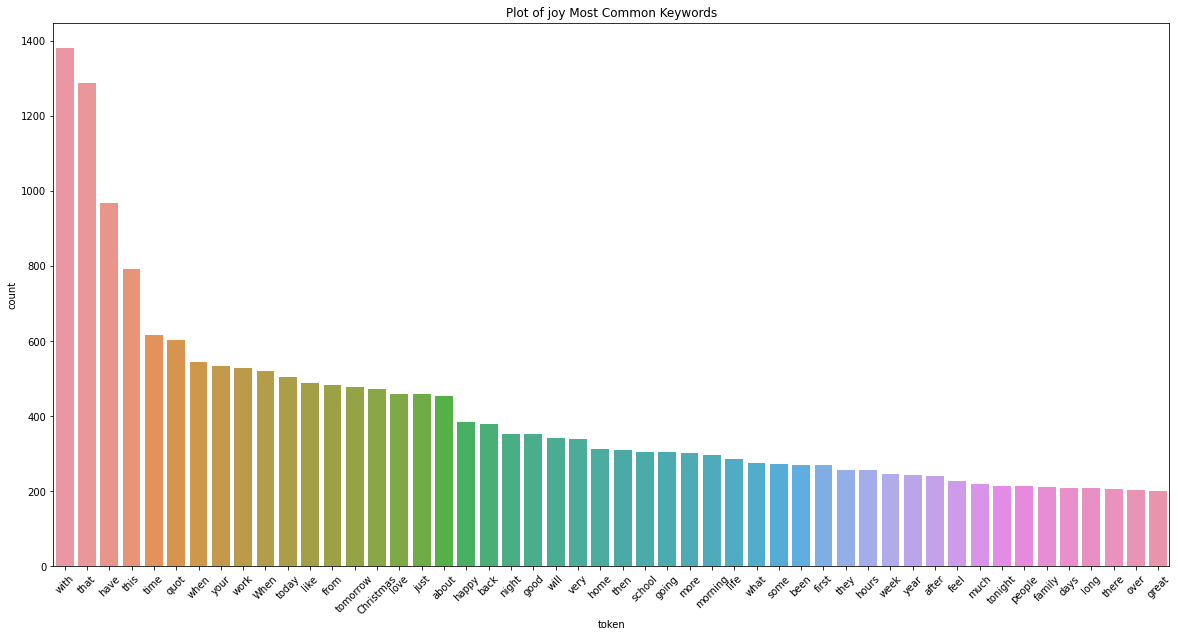

In [38]:
plot_most_common_words(keyword_joy, 'joy')

In [39]:
surprise_list = data[data['Emotion']=='surprise']['Clean_Text'].tolist()
# Document
surprise_docx = ' '.join(surprise_list)

#Extract Keywords

keyword_surprise = extract_keywords(surprise_docx)

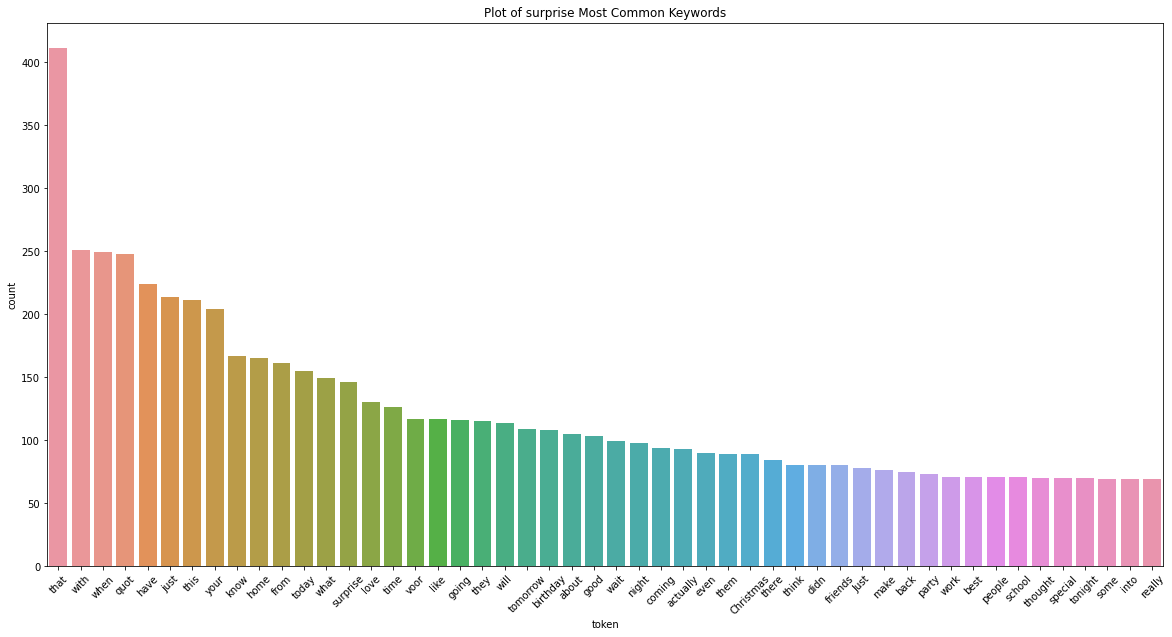

In [40]:
plot_most_common_words(keyword_surprise, 'surprise')

In [41]:
### Word cloud

from wordcloud import WordCloud

In [42]:
### method for word 
def plot_wordcloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(20, 10))
    plt.imshow(mywordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    

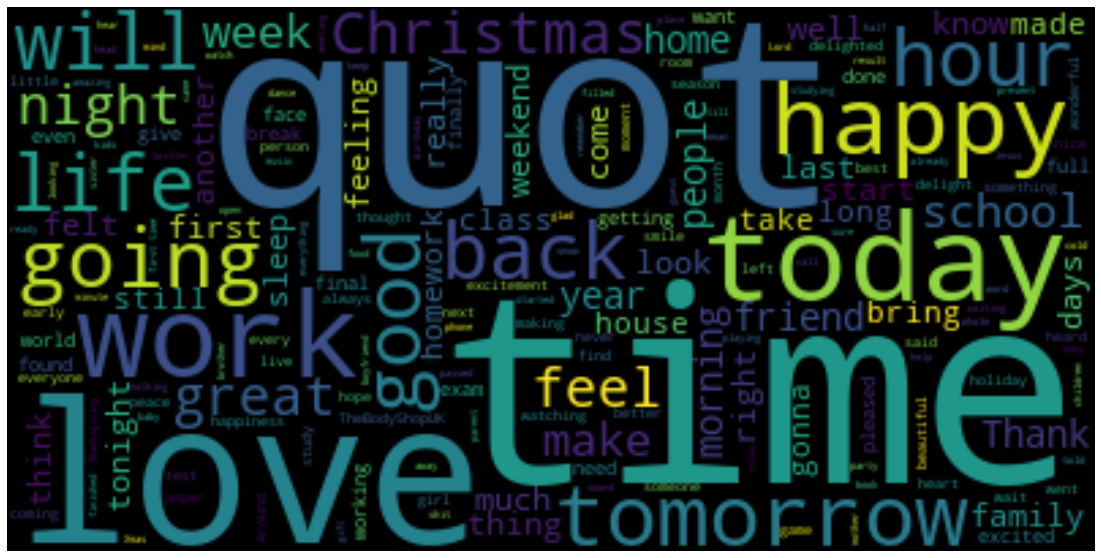

In [43]:
plot_wordcloud(joy_docx)

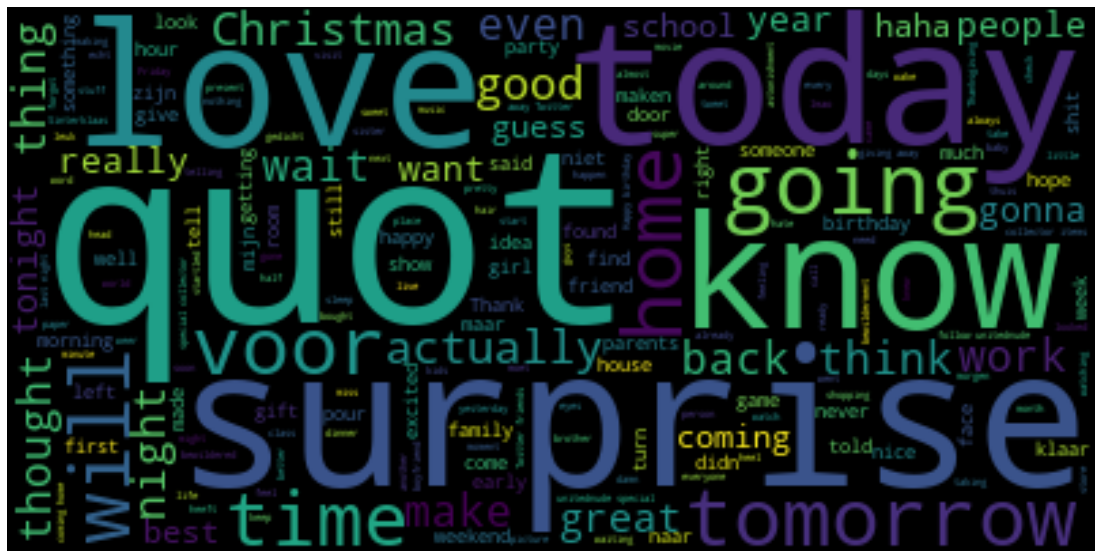

In [44]:
plot_wordcloud(surprise_docx)

### Machine Learning
+ Naive Bayes
+ Logistic Regression
+ KNN
+ DecisionTree


### Compare with SparkNLP/ NLU Jhon shows Lab

In [46]:
# Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB